# 資料清理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import seaborn as sns
data=pd.read_csv('/Users/timlin/Downloads/raw.csv')
data

/var/folders/5f/gfyl_25n681_n97cvdmth2fw0000gn/T/ipykernel_17228/516310637.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/timlin/Downloads/raw.csv')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
520131,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011/12/9 12:50,0.85,12680.0,France
520132,581587,CHILDREN'S APRON DOLLY GIRL,6,2011/12/9 12:50,2.10,12680.0,France
520133,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011/12/9 12:50,4.15,12680.0,France
520134,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011/12/9 12:50,4.15,12680.0,France


In [2]:
Revenue=data.copy()
Revenue = Revenue[Revenue['Price'] != 0]
Revenue = Revenue[Revenue['Itemname'] != 'Adjust bad debt']
Revenue['Total']=Revenue['Quantity']*Revenue['Price']
Revenue

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
520131,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011/12/9 12:50,0.85,12680.0,France,10.20
520132,581587,CHILDREN'S APRON DOLLY GIRL,6,2011/12/9 12:50,2.10,12680.0,France,12.60
520133,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011/12/9 12:50,4.15,12680.0,France,16.60
520134,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011/12/9 12:50,4.15,12680.0,France,16.60


In [3]:
Revenue.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519550 entries, 0 to 520135
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      519550 non-null  object 
 1   Itemname    519550 non-null  object 
 2   Quantity    519550 non-null  int64  
 3   Date        519550 non-null  object 
 4   Price       519550 non-null  float64
 5   CustomerID  519550 non-null  object 
 6   Country     519550 non-null  object 
 7   Total       519550 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 35.7+ MB


In [4]:
Revenue.to_csv('/Users/timlin/Downloads/shoppingcart.csv')

In [5]:
Revenue['Date']=Revenue['Date'].astype('datetime64')

In [6]:
Revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519550 entries, 0 to 520135
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      519550 non-null  object        
 1   Itemname    519550 non-null  object        
 2   Quantity    519550 non-null  int64         
 3   Date        519550 non-null  datetime64[ns]
 4   Price       519550 non-null  float64       
 5   CustomerID  519550 non-null  object        
 6   Country     519550 non-null  object        
 7   Total       519550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 35.7+ MB


### 2011年銷售

Text(0.5, 0, 'Date (Month)')

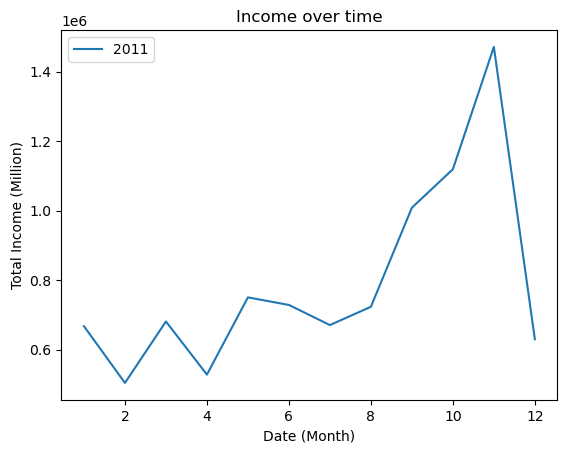

In [7]:
# Grouping the data by month and summing the total price for the year 2011
Revenue[Revenue["Date"].dt.year == 2011].groupby(Revenue["Date"].dt.month)["Total"].sum().plot()

# Adding legend and plot labels
plt.legend([ "2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

### 銷量前十與營收前十的產品

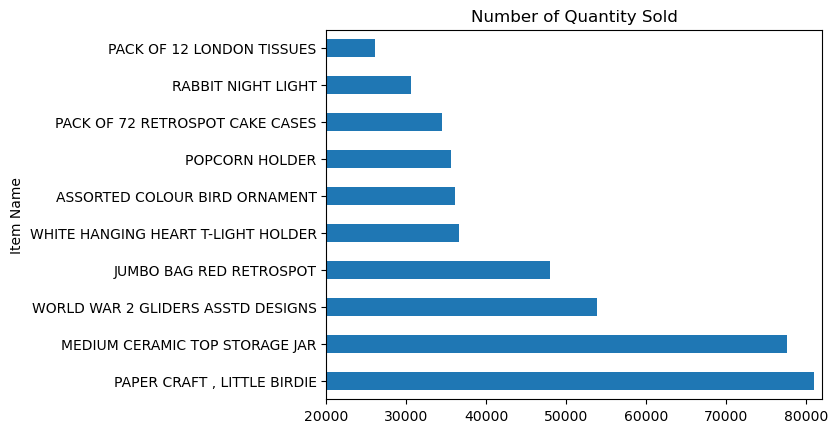

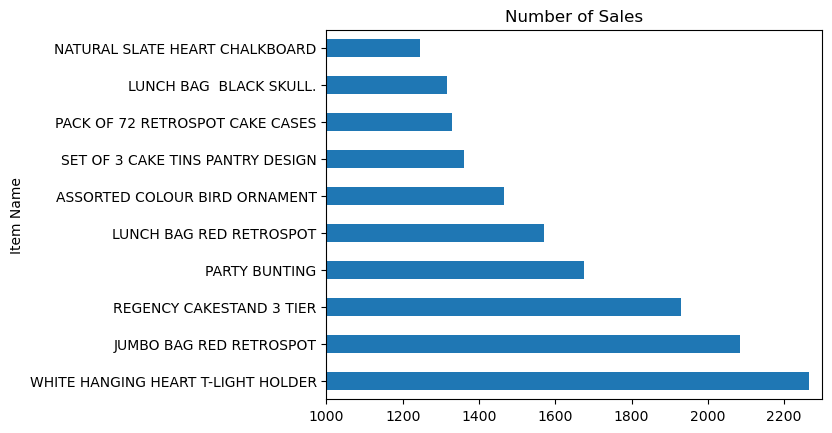

In [8]:
# Plotting the top 10 most sold products by quantity
Revenue.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
Revenue['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

In [9]:
Product=Revenue.copy()

# Filter rows based on item occurrences
item_counts = Revenue['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
Product = Product[Product['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = Product['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
Product =Product[Product['BillNo'].isin(filtered_bills)]


In [10]:
pivot_table = pd.pivot_table(Product[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)
pivot_table

Itemname,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
572190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets with minimum support of 0.01 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold=0.5)


# Sort rules based on support in descending order
rules_sorted_by_support = rules.sort_values(by='support', ascending=False)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules sorted by support
print("\nAssociation Rules (Sorted by Support):")
print(rules_sorted_by_support)

Frequent Itemsets:
       support                                           itemsets
0     0.017370                           (10 COLOUR SPACEBOY PEN)
1     0.013751                  (12 MESSAGE CARDS WITH ENVELOPES)
2     0.019653                    (12 PENCIL SMALL TUBE WOODLAND)
3     0.019820              (12 PENCILS SMALL TUBE RED RETROSPOT)
4     0.019597                      (12 PENCILS SMALL TUBE SKULL)
...        ...                                                ...
2467  0.010355  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...
2468  0.010188  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...
2469  0.010300  (LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT,...
2470  0.010467  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
2471  0.011302  (CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...

[2472 rows x 2 columns]

Association Rules (Sorted by Support):
                                     antecedents  \
161                    (JUMBO BAG PINK POLKADOT)   
105            (GREE

In [12]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011469,0.039305,0.011190,0.975728,24.824404,0.010740,39.580626,0.970851
613,"(HERB MARKER CHIVES, HERB MARKER THYME)",(HERB MARKER PARSLEY),0.010411,0.012916,0.010077,0.967914,74.938272,0.009942,30.764113,0.997036
607,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
620,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010355,0.012916,0.010021,0.967742,74.924917,0.009887,30.599599,0.996977
1220,"(HERB MARKER BASIL, HERB MARKER ROSEMARY, HERB...",(HERB MARKER THYME),0.010578,0.012916,0.010188,0.963158,74.570009,0.010052,26.792276,0.997137
...,...,...,...,...,...,...,...,...,...,...
25,(RED RETROSPOT CUP),(BLUE POLKADOT CUP),0.021378,0.018038,0.010689,0.500000,27.719136,0.010304,1.963924,0.984981
1159,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",0.026834,0.021824,0.013417,0.500000,22.910714,0.012832,1.956352,0.982723
113,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN),0.021935,0.030230,0.010968,0.500000,16.539595,0.010304,1.939539,0.960610
147,(LOVE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM),0.025832,0.042701,0.012916,0.500000,11.709257,0.011813,1.914597,0.938850


In [13]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
161,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
104,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
105,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
174,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065583,0.113963,0.040140,0.612054,5.370650,0.032666,2.283921,0.870920
172,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064859,0.113963,0.037635,0.580258,5.091639,0.030243,2.110907,0.859335
...,...,...,...,...,...,...,...,...,...,...
609,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER CHIVES),0.011691,0.011469,0.010021,0.857143,74.737864,0.009887,6.919719,0.998291
624,(HERB MARKER ROSEMARY),"(HERB MARKER CHIVES, HERB MARKER THYME)",0.013028,0.010411,0.010021,0.769231,73.887289,0.009886,4.288220,0.999487
673,"(LUNCH BAG RED RETROSPOT, JUMBO BAG BAROQUE B...",(JUMBO BAG RED RETROSPOT),0.014364,0.113963,0.010021,0.697674,6.121948,0.008384,2.930738,0.848846
987,"(LUNCH BAG APPLE DESIGN, LUNCH BAG PINK POLKADOT)",(LUNCH BAG SPACEBOY DESIGN),0.019263,0.063857,0.010021,0.520231,8.146812,0.008791,1.951238,0.894483


In [14]:
rules.to_csv('/Users/timlin/Downloads/rules.csv')

In [15]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 17 to 371
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         1397 non-null   object 
 1   consequents         1397 non-null   object 
 2   antecedent support  1397 non-null   float64
 3   consequent support  1397 non-null   float64
 4   support             1397 non-null   float64
 5   confidence          1397 non-null   float64
 6   lift                1397 non-null   float64
 7   leverage            1397 non-null   float64
 8   conviction          1397 non-null   float64
 9   zhangs_metric       1397 non-null   float64
dtypes: float64(8), object(2)
memory usage: 120.1+ KB


In [16]:
rules[['antecedents','consequents']]

,antecedents,consequents
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE)
613,"(HERB MARKER CHIVES, HERB MARKER THYME)",(HERB MARKER PARSLEY)
607,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER PARSLEY)
620,"(HERB MARKER CHIVES, HERB MARKER ROSEMARY)",(HERB MARKER THYME)
1220,"(HERB MARKER BASIL, HERB MARKER ROSEMARY, HERB...",(HERB MARKER THYME)
...,...,...
25,(RED RETROSPOT CUP),(BLUE POLKADOT CUP)
1159,"(STRAWBERRY CHARLOTTE BAG, RED RETROSPOT CHARL...","(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT..."
113,(HAND WARMER RED LOVE HEART),(HAND WARMER SCOTTY DOG DESIGN)
147,(LOVE HOT WATER BOTTLE),(HOT WATER BOTTLE KEEP CALM)


In [17]:
def generate_cart_recommendations(products, association_rules, lift=1):
    # Filter rules with sufficient confidence
    relevant_rules = association_rules[association_rules['lift'] > lift]

    recommendations = set()

    for product in products:
        # Find rules where the product is in the antecedents
        matching_rules = relevant_rules[relevant_rules['antecedents'].apply(lambda x: product in x)]

        # Get consequents from matching rules and add them to recommendations
        recommendations.update([tuple(consequent) for consequent in matching_rules['consequents']])

    return list(recommendations)

# Example usage with multiple products in a list:
products = ['HERB MARKER ROSEMARY','HERB MARKER CHIVES']
recommendations = generate_cart_recommendations(products, rules)
print("Recommendations for products:")
print(recommendations)

Recommendations for products:
[('HERB MARKER ROSEMARY',), ('HERB MARKER PARSLEY',), ('HERB MARKER BASIL',), ('HERB MARKER CHIVES', 'HERB MARKER PARSLEY'), ('HERB MARKER MINT', 'HERB MARKER THYME', 'HERB MARKER PARSLEY'), ('HERB MARKER MINT',), ('HERB MARKER ROSEMARY', 'HERB MARKER PARSLEY'), ('HERB MARKER THYME', 'HERB MARKER BASIL', 'HERB MARKER PARSLEY'), ('HERB MARKER MINT', 'HERB MARKER BASIL'), ('HERB MARKER THYME', 'HERB MARKER PARSLEY'), ('HERB MARKER THYME', 'HERB MARKER ROSEMARY'), ('HERB MARKER MINT', 'HERB MARKER THYME'), ('HERB MARKER THYME', 'HERB MARKER BASIL'), ('HERB MARKER MINT', 'HERB MARKER PARSLEY'), ('HERB MARKER THYME',), ('HERB MARKER CHIVES',), ('HERB MARKER CHIVES', 'HERB MARKER THYME'), ('HERB MARKER BASIL', 'HERB MARKER PARSLEY')]


In [18]:
association_rules = rules[['antecedents','consequents']]

# 用户当前购物车或浏览历史
user_history = ['HERB MARKER CHIVES', 'HERB MARKER THYME','BEADED CRYSTAL HEART PINK ON STICK']

# 获取与用户历史相关的推荐项
def get_recommendations(user_history, association_rules):
    recommendations = set()

    for item in user_history:
        matching_rules = association_rules[association_rules['antecedents'].apply(lambda x: item in x)]

        for consequents in matching_rules['consequents']:
            recommendations.update(consequents)
            
    for item in user_history:
        recommendations.discard(item)
 

    return recommendations

# 获取推荐
user_recommendations = get_recommendations(user_history, association_rules)

print("Recommended items for the user:")
print(user_recommendations)

Recommended items for the user:
{'HERB MARKER ROSEMARY', 'HERB MARKER PARSLEY', 'HERB MARKER MINT', 'HERB MARKER BASIL', 'DOTCOM POSTAGE'}


In [19]:
def arl_recommender(rules_df, product_nam3, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

antecedents: 這是關聯規則的前提項目，即規則的左側項目。/n
consequents: 這是關聯規則的結果項目，即規則的右側項目。/n
antecedent support: 前提項目的支持度，表示在資料集中出現該項目的比例。
consequent support: 結果項目的支持度，與前提項目支持度相似。
support: 該關聯規則的支持度，表示同時包含前提項目和結果項目的比例。
confidence: 該關聯規則的信賴度，表示在前提項目出現的情況下，結果項目也同時出現的比例。
lift: 提升度，表示該規則的信賴度相對於如果前提項目和結果項目是獨立的情況下的改進倍數。
leverage: 指標用於衡量前提項目和結果項目同時出現的情況與預期中的差異。
conviction: 表示如果前提項目不存在，則結果項目不出現的可能性。
zhangs_metric: 張氏指標，用於評估規則的相關性。

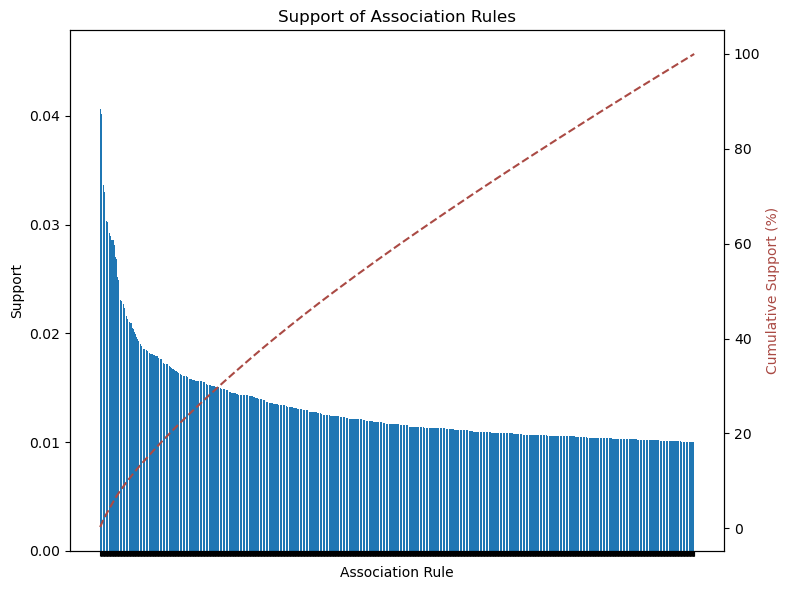

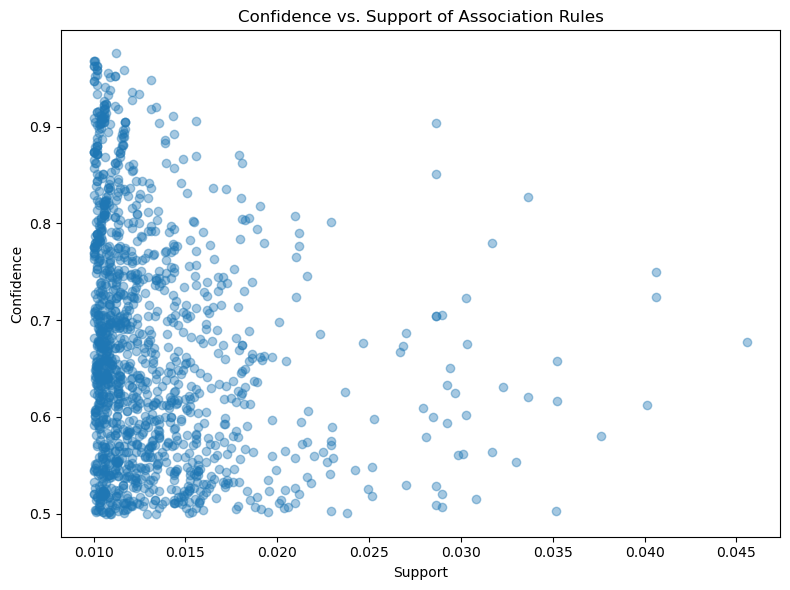

In [20]:
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [21]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,0.020484,0.053649,0.013177,0.669239,19.708485,0.012035,3.747162,0.936059
std,0.008136,0.028617,0.004261,0.117984,18.980158,0.003706,3.359500,0.042409
min,0.010355,0.010355,0.010021,0.500000,4.406280,0.008092,1.779735,0.799018
25%,0.015421,0.032569,0.010634,0.569482,8.891545,0.009883,2.190007,0.909386
50%,0.018595,0.054170,0.011636,0.650165,12.415811,0.010800,2.703477,0.940321
75%,0.022993,0.065583,0.014197,0.750257,18.800835,0.012937,3.725998,0.967969
max,0.070037,0.121367,0.045596,0.975728,77.106404,0.037926,39.580626,0.999566


In [22]:
best_selling_items = Revenue.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
47,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
25,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4024
20,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
42,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
41,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
43,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,639
26,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Belgium')])

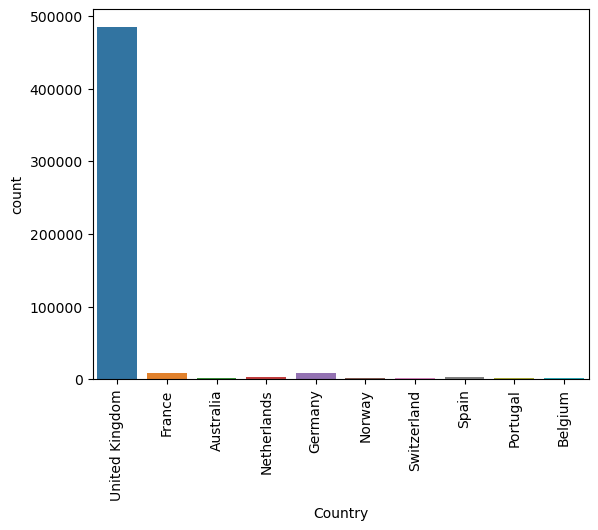

In [23]:
#Country Purchase Record
top_5_country = Revenue['Country'].value_counts().nlargest(10).index
df_top_5 = Revenue[Revenue['Country'].isin(top_5_country)]

# Create a countplot for the top 10 item names
ax=sns.countplot(data=df_top_5, x='Country')
plt.xticks(rotation=90)

In [24]:
# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'HERB MARKER CHIVES' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN'.

Upselling Recommendations:
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER MINT, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER THYME', reco

In [25]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

For customers who bought 'HERB MARKER CHIVES', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER ROSEMARY.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE ROSES, REGENCY TEA PLATE GREEN.


In [26]:
#France Purchase Record
# reduction of the dataset to a single country
df_fr = Revenue[Revenue["Country"] == "France"]
df_fr

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
...,...,...,...,...,...,...,...,...
520131,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
520132,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
520133,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
520134,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['BillNo', "Itemname"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['BillNo', 'BillNo'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    
fr_inv_pro_df = create_invoice_product_df(df_fr, id=True)
fr_inv_pro_df

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets with minimum support of 0.01 (10%)
frequent_itemsets = apriori(fr_inv_pro_df, min_support=0.01, use_colnames=True)

# Generate association rules
df_fr = association_rules(frequent_itemsets, "confidence", min_threshold=0.5)


# Sort rules based on support in descending order
rules_sorted_by_support = rules.sort_values(by='support', ascending=False)


# Print association rules sorted by support
print("\nAssociation Rules (Sorted by Support):")
print(rules_sorted_by_support)


/Users/timlin/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Association Rules (Sorted by Support):
                                           antecedents  \
161                          (JUMBO BAG PINK POLKADOT)   
104                  (ROSES REGENCY TEACUP AND SAUCER)   
105                  (GREEN REGENCY TEACUP AND SAUCER)   
174                           (JUMBO STORAGE BAG SUKI)   
172                (JUMBO SHOPPER VINTAGE RED PAISLEY)   
..                                                 ...   
609        (HERB MARKER ROSEMARY, HERB MARKER PARSLEY)   
624                             (HERB MARKER ROSEMARY)   
673  (LUNCH BAG RED RETROSPOT, JUMBO  BAG BAROQUE B...   
987  (LUNCH BAG APPLE DESIGN, LUNCH BAG PINK POLKADOT)   
431    (DOLLY GIRL LUNCH BOX, LUNCH BOX I LOVE LONDON)   

                                 consequents  antecedent support  \
161                (JUMBO BAG RED RETROSPOT)            0.067309   
104        (GREEN REGENCY TEACUP AND SAUCER)            0.056174   
105        (ROSES REGENCY TEACUP AND SAUCER)            0.0

In [29]:
df_fr= df_fr.sort_values(['confidence', 'lift'], ascending =[False, False]) 
df_fr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19367,"(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...","(PLASTERS IN TIN CIRCUS PARADE, DINOSAUR LUNCH...",0.010204,0.010204,0.010204,1.0,98.000000,0.010100,inf,1.000000
19370,"(PLASTERS IN TIN CIRCUS PARADE, DINOSAUR LUNCH...","(ALARM CLOCK BAKELIKE CHOCOLATE, ALARM CLOCK B...",0.010204,0.010204,0.010204,1.0,98.000000,0.010100,inf,1.000000
20362,"(BUNDLE OF 3 ALPHABET EXERCISE BOOKS, ALARM CL...","(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK...",0.010204,0.010204,0.010204,1.0,98.000000,0.010100,inf,1.000000
20363,"(SKULL LUNCH BOX WITH CUTLERY, ALARM CLOCK BAK...","(BUNDLE OF 3 ALPHABET EXERCISE BOOKS, ALARM CL...",0.010204,0.010204,0.010204,1.0,98.000000,0.010100,inf,1.000000
21327,"(PHOTO CUBE, ALARM CLOCK BAKELIKE GREEN)","(ALARM CLOCK BAKELIKE ORANGE, SPACEBOY BIRTHDA...",0.010204,0.010204,0.010204,1.0,98.000000,0.010100,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
65947,"(LUNCH BAG RED RETROSPOT, RED HARMONICA IN BO...",(POSTAGE),0.020408,0.765306,0.010204,0.5,0.653333,-0.005414,0.469388,-0.351351
75667,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(POSTAGE),0.025510,0.765306,0.012755,0.5,0.653333,-0.006768,0.469388,-0.352542
95722,"(PLASTERS IN TIN CIRCUS PARADE, ALARM CLOCK BA...",(POSTAGE),0.020408,0.765306,0.010204,0.5,0.653333,-0.005414,0.469388,-0.351351
177866,"(LUNCH BAG SPACEBOY DESIGN, LUNCH BAG DOLLY GI...",(POSTAGE),0.020408,0.765306,0.010204,0.5,0.653333,-0.005414,0.469388,-0.351351


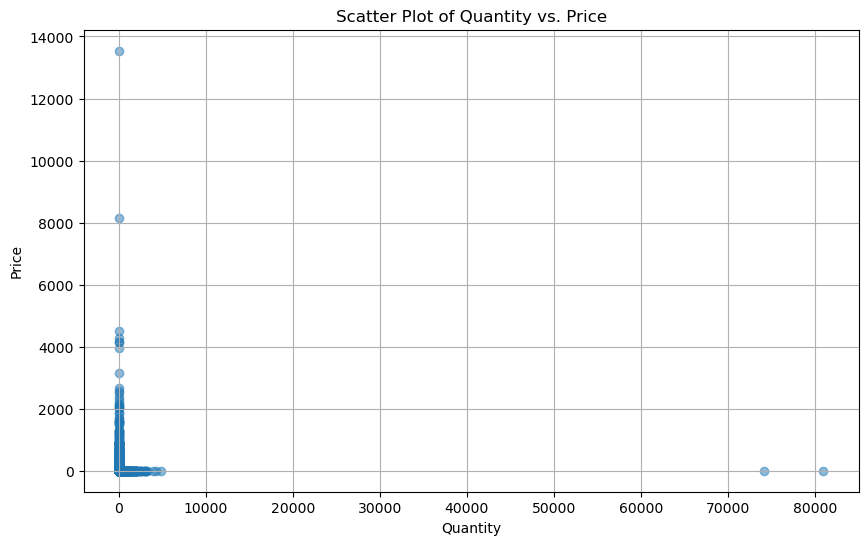

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

  # 替换'your_data.csv'为您的数据文件路径

# 提取数量（Quantity）和价格（Price）列
quantity = Revenue['Quantity']
price = Revenue['Price']

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(quantity, price, alpha=0.5)  # 使用alpha参数调整点的透明度

# 添加标签和标题
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Scatter Plot of Quantity vs. Price')

# 显示散点图
plt.grid(True)
plt.show()

In [ ]:
#France Purchase Record
# reduction of the dataset to a single country
df_uk = Revenue[Revenue["Country"] == "United Kingdom"]
uk_inv_pro_df = create_invoice_product_df(df_uk, id=True)
uk_inv_pro_df
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets with minimum support of 0.01 (10%)
frequent_itemsets = apriori(uk_inv_pro_df, min_support=0.01, use_colnames=True)

# Generate association rules
df_uk = association_rules(frequent_itemsets, "confidence", min_threshold=0.5)


# Sort rules based on support in descending order
rules_sorted_by_support = rules.sort_values(by='support', ascending=False)


# Print association rules sorted by support
print("\nAssociation Rules (Sorted by Support):")
print(rules_sorted_by_support)
df_uk= df_uk.sort_values(['confidence', 'lift'], ascending =[False, False]) 
df_uk

/Users/timlin/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
